# **Automatidata project**


In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("/Users/mj/Downloads/2017_Yellow_Taxi_Trip_Data (1).csv") 





# Perform EDA

In [3]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:

df0.shape

(22699, 18)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df0.drop_duplicates()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [8]:

df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
# Check the format of the data

df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [10]:
# Convert datetime columns to datetime
df0['tpep_pickup_datetime']= pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime']= pd.to_datetime(df0['tpep_dropoff_datetime'])


In [11]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [12]:
# Create `duration` column

df0['duration']= (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.seconds/60


In [13]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Deal with Outliers


In [14]:


df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

the most important columns to check for outliers that will be used for the model:
* `trip_distance`
* `fare_amount`
* `duration`



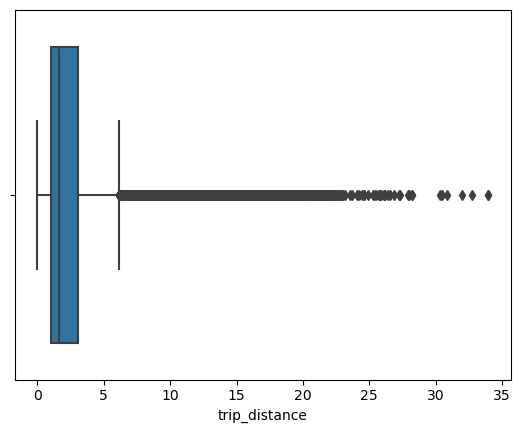

In [15]:
# Boxplot for trip_distance
sns.boxplot(x=df0['trip_distance'])
plt.show()






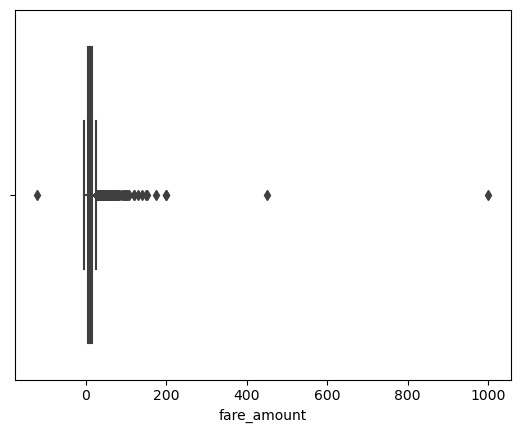

In [16]:
# Boxplot for fare_amount
sns.boxplot(x=df0['fare_amount'])
plt.show()

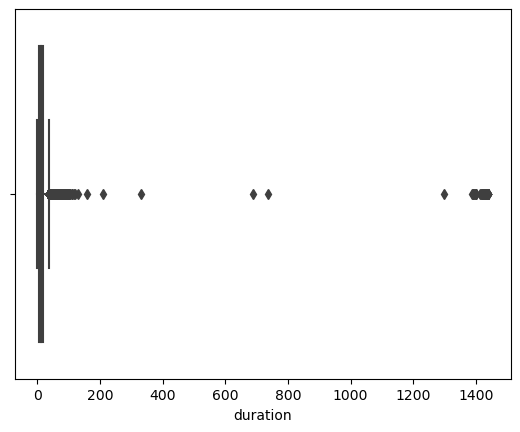

In [17]:
# Boxplot for duration
sns.boxplot(x=df0['duration'])
plt.show()

#### `trip_distance` outliers



In [18]:
df0['trip_distance'].duplicated().sum()


21154

In [19]:
df0 = df0.drop_duplicates(subset=['trip_distance'])


In [20]:
# Sort the 'trip_distance' column
sort_trip_dist=df0['trip_distance'].sort_values()
# Eliminate duplicates
#unique_trip_distance = sorted_trip_distance.drop_duplicates()

#least 10 values
least_10_values = sort_trip_dist.head(20)

# Display the results
print(least_10_values)

128      0.00
2985     0.01
323      0.02
3158     0.03
1510     0.04
10146    0.05
4423     0.06
922      0.07
4623     0.08
22035    0.09
1152     0.10
827      0.11
314      0.12
1798     0.13
7263     0.14
8861     0.15
2932     0.16
3682     0.17
11695    0.18
7298     0.19
Name: trip_distance, dtype: float64


In [21]:
count_zero_distance_trips = df0[df0['trip_distance'] <= 0].shape[0]
print("Number of trips with distance less than or equal to 0:", count_zero_distance_trips)



Number of trips with distance less than or equal to 0: 1


In [22]:
# Drop rows where 'trip_distance' is 0 or less than 0
df0 = df0[df0['trip_distance'] > 0]


#### `fare_amount` outliers

In [23]:

count_zero_fare_trips = df0[df0['fare_amount'] <= 0].shape[0]
print("Number of trips with fare amount less than or equal to 0:", count_zero_fare_trips)

Number of trips with fare amount less than or equal to 0: 2


In [24]:
# Impute values less than $0 with 0


sort_trip_fare=df0['fare_amount'].sort_values()
# Eliminate duplicates
#unique_trip_distance = sorted_trip_distance.drop_duplicates()

#least 10 values
least_10_values = sort_trip_fare.head(20)

# Display the results
print(least_10_values)

4423    -3.0
314     -2.5
2985     2.5
3158     2.5
22035    2.5
323      2.5
1510     2.5
6637     3.0
3682     3.0
1338     3.0
922      3.0
7263     3.0
1626     3.0
2932     3.0
11695    3.0
302      3.5
49       3.5
145      3.5
991      3.5
445      3.5
Name: fare_amount, dtype: float64


In [25]:
# Drop rows where 'trip_distance' is 0 or less than 0
df0 = df0[df0['fare_amount'] > 0]


CLEAN OUTLIERS

In [26]:
# Calculate the upper and lower limits
Q1 = df0['trip_distance'].quantile(0.25)
Q3 = df0['trip_distance'].quantile(0.75) 
IQR = Q3 - Q1 
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df0['trip_distance'] >= upper)[0]
lower_array = np.where(df0['trip_distance'] <= lower)[0]

# Reset index before removing outliers
df0.reset_index(drop=True, inplace=True)

# Removing the outliers
df0.drop(index=upper_array, inplace=True)
df0.drop(index=lower_array, inplace=True)



In [27]:
# Calculate the upper and lower limits
Q1 = df0['fare_amount'].quantile(0.25)
Q3 = df0['fare_amount'].quantile(0.75) 
IQR = Q3 - Q1 
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df0['fare_amount'] >= upper)[0]
lower_array = np.where(df0['fare_amount'] <= lower)[0]

# Reset index before removing outliers
df0.reset_index(drop=True, inplace=True)

# Removing the outliers
df0.drop(index=upper_array, inplace=True)
df0.drop(index=lower_array, inplace=True)


In [28]:
# Calculate the upper and lower limits
Q1 = df0['duration'].quantile(0.25)
Q3 = df0['duration'].quantile(0.75) 
IQR = Q3 - Q1 
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df0['duration'] >= upper)[0]
lower_array = np.where(df0['duration'] <= lower)[0]

# Reset index before removing outliers
df0.reset_index(drop=True, inplace=True)

# Removing the outliers
df0.drop(index=upper_array, inplace=True)
df0.drop(index=lower_array, inplace=True)


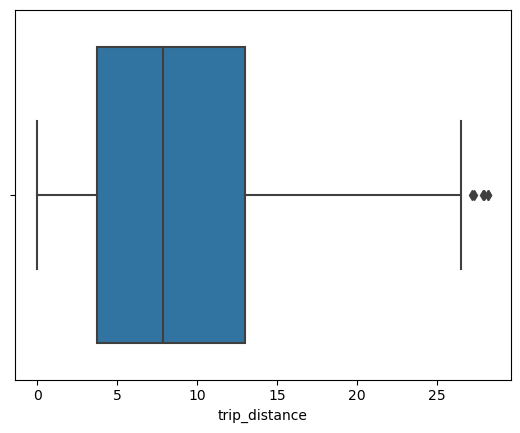

In [29]:
# Boxplot for trip_distance
sns.boxplot(x=df0['trip_distance'])
plt.show()

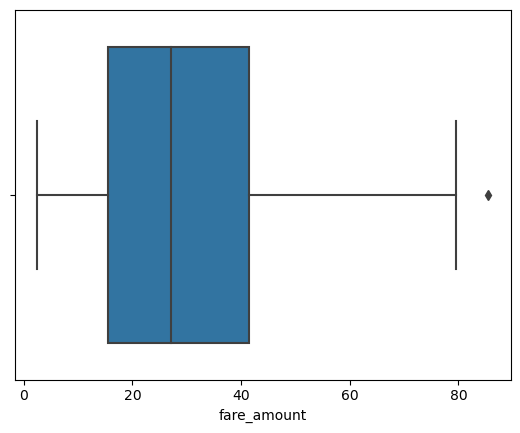

In [30]:
# Boxplot for fare_amount
sns.boxplot(x=df0['fare_amount'])
plt.show()

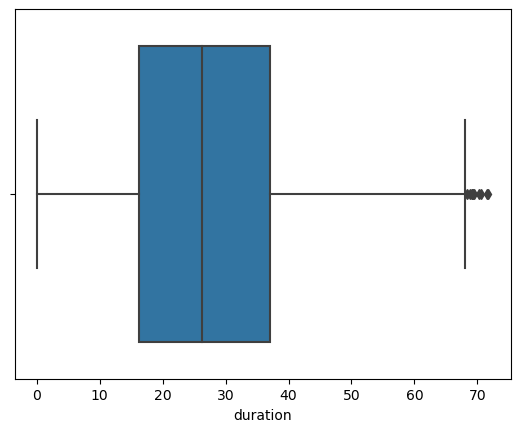

In [31]:
# Boxplot for duration
sns.boxplot(x=df0['duration'])
plt.show()

### Feature engineering

In [32]:
num_distinct_values = df0['PULocationID'].nunique()
print(num_distinct_values)

101


In [33]:
df0['PULocationID'] = df0['PULocationID'].astype(str)
print(df0['PULocationID'])

0       100
1       186
2       262
3       188
4         4
       ... 
1524    166
1525    138
1527    138
1528    181
1530    132
Name: PULocationID, Length: 1484, dtype: object


In [34]:
# Create `pickup_dropoff` column

# Convert pickup and dropoff location IDs to strings and join them with a space
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)

# Display the DataFrame with the new column
df0.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


In [35]:
dist_Pick = df0['pickup_dropoff'].nunique()
print(dist_Pick)

1040


In [36]:
df0.shape

(1484, 20)

In [37]:
print(df0['pickup_dropoff'])

0       100 231
1        186 43
2       262 236
3        188 97
4         4 112
         ...   
1524    166 231
1525    138 220
1527    138 100
1528    181 132
1530    132 164
Name: pickup_dropoff, Length: 1484, dtype: object


In [38]:
#'trip_distance' mean 
grouped = df0.groupby('pickup_dropoff')['trip_distance'].mean()

# Convert the grouped Series to a DataFrame
grouped_df = grouped.reset_index(name='mean_distance')

# Filter rows with 'pickup_dropoff' values appearing more than once
duplicate_pickup_dropoff = grouped_df[grouped_df['mean_distance'].notna() & (grouped_df['mean_distance'] > 1)]['pickup_dropoff']

# Filter the original DataFrame to show rows with duplicate 'pickup_dropoff' values
filtered_df = df0[df0['pickup_dropoff'].isin(duplicate_pickup_dropoff)]

# Print the filtered DataFrame
filtered_df.head(21)



,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.00,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.50,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.00,0.5,0.5,2.06,0.00,0.3,12.36,8.000000,161 236
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.50,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,79 241
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.00,1.0,0.5,1.78,0.00,0.3,19.58,21.983333,237 114
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.00,0.0,0.5,0.00,0.00,0.3,9.80,12.116667,234 249
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.00,0.0,0.5,2.75,0.00,0.3,16.55,20.433333,239 237
10,18017909,2,2017-03-04 11:58:00,2017-03-04 12:13:12,1,1.77,1,N,162,142,1,11.50,0.0,0.5,2.46,0.00,0.3,14.76,15.200000,162 142


In [39]:
# Create a new column 'pickup_dropoff' with combined pickup and dropoff locations
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)

# Calculate the mean distance for each unique combination of pickup and dropoff points
mean_distances = df0.groupby('pickup_dropoff')['trip_distance'].mean()
mean_duration = df0.groupby('pickup_dropoff')['duration'].mean()

# Add the 'mean_distance' column to the DataFrame
df0['mean_distance'] = df0['pickup_dropoff'].map(mean_distances)
df0['mean_duration'] = df0['pickup_dropoff'].map(mean_duration)
df0.head(40)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.340000,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,1.800000,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,1.000000,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.370000,16.716667
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.5,0.5,2.06,0.00,0.3,12.36,8.000000,161 236,2.625000,12.091667
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,79 241,12.830000,59.633333
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,1.0,0.5,1.78,0.00,0.3,19.58,21.983333,237 114,2.980000,21.983333
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.0,0.5,0.00,0.00,0.3,9.80,12.116667,234 249,1.200000,12.116667
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.0,0.5,2.75,0.00,0.3,16.55,20.433333,239 237,1.600000,20.433333


#### Create `mean_duration` column


In [40]:


# Calculate the mean distance for each unique combination of pickup and dropoff points
mean_distances = df0.groupby('pickup_dropoff')['trip_distance'].mean()
mean_duration = df0.groupby('pickup_dropoff')['duration'].mean()

# Add the 'mean_distance' column to the DataFrame
df0['mean_distance'] = df0['pickup_dropoff'].map(mean_distances)
df0['mean_duration'] = df0['pickup_dropoff'].map(mean_duration)
df0.head(40)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.340000,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,1.800000,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,1.000000,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.370000,16.716667
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.5,0.5,2.06,0.00,0.3,12.36,8.000000,161 236,2.625000,12.091667
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,79 241,12.830000,59.633333
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,1.0,0.5,1.78,0.00,0.3,19.58,21.983333,237 114,2.980000,21.983333
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.0,0.5,0.00,0.00,0.3,9.80,12.116667,234 249,1.200000,12.116667
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.0,0.5,2.75,0.00,0.3,16.55,20.433333,239 237,1.600000,20.433333


In [41]:
#check my data
fdf = df0[['pickup_dropoff', 'duration', 'mean_duration', 'trip_distance', 'mean_distance']]

# Filter rows where duration is not equal to mean_duration
filtered_fdf = fdf[fdf['duration'] != fdf['mean_duration']]

# Print the filtered DataFrame
print(filtered_fdf.head())


   pickup_dropoff   duration  mean_duration  trip_distance  mean_distance
5         161 236   8.000000      12.091667           2.30       2.625000
10        162 142  15.200000      17.208333           1.77       1.650000
11        236 132  36.800000      31.655556          18.90      19.303333
15        239 231  16.133333      17.166667           5.93       5.950000
19          79 68  13.066667       9.625000           2.77       1.845000


In [42]:
# Create 'day' col

# Create the 'day' column with the day of the week name
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create the 'month' column with the month name
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

print((df0[['tpep_pickup_datetime','day','month']]).head())

  tpep_pickup_datetime       day     month
0  2017-03-25 08:55:43  Saturday     March
1  2017-04-11 14:53:28   Tuesday     April
2  2017-12-15 07:26:56    Friday  December
3  2017-05-07 13:17:59    Sunday       May
4  2017-04-15 23:32:20  Saturday     April


In [43]:
print(df0['tpep_pickup_datetime'].dtype)


datetime64[ns]


In [44]:
# Add a 'weekday' column for easier filtering
df0['weekday'] = df0['tpep_pickup_datetime'].dt.weekday

def create_rush_hour_column(df):
    # Define the rush hour times
    rh_stime_a = pd.to_datetime('06:00:00').time()
    rh_etime_a = pd.to_datetime('10:00:00').time()
    rh_stime_b = pd.to_datetime('16:00:00').time()
    rh_etime_b = pd.to_datetime('20:00:00').time()

    # Convert 'tpep_pickup_datetime' to datetime for direct comparison
    df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Create a new column 'is_rush_hour' based on the specified conditions
    df['is_rush_hour'] = (
        (df['weekday'] != 5) &  # Exclude Saturday
        (df['weekday'] != 6) &  # Exclude Sunday
        (
            (df['pickup_datetime'].dt.time.between(rh_stime_a, rh_etime_a)) |
            (df['pickup_datetime'].dt.time.between(rh_stime_b, rh_etime_b))
        )
    ).astype(int)  # Convert boolean to 1 (True) or 0 (False)


create_rush_hour_column(df0)

# Print the DataFrame with the new 'is_rush_hour' column
print(df0[['tpep_pickup_datetime', 'weekday', 'pickup_datetime', 'is_rush_hour']])



     tpep_pickup_datetime  weekday     pickup_datetime  is_rush_hour
0     2017-03-25 08:55:43        5 2017-03-25 08:55:43             0
1     2017-04-11 14:53:28        1 2017-04-11 14:53:28             0
2     2017-12-15 07:26:56        4 2017-12-15 07:26:56             1
3     2017-05-07 13:17:59        6 2017-05-07 13:17:59             0
4     2017-04-15 23:32:20        5 2017-04-15 23:32:20             0
...                   ...      ...                 ...           ...
1524  2017-08-09 12:24:11        2 2017-08-09 12:24:11             0
1525  2017-03-16 14:56:12        3 2017-03-16 14:56:12             0
1527  2017-01-16 11:18:36        0 2017-01-16 11:18:36             0
1528  2017-02-22 06:45:04        2 2017-02-22 06:45:04             1
1530  2017-08-06 16:43:59        6 2017-08-06 16:43:59             0

[1484 rows x 4 columns]


In [45]:
# Filter rows with 'rush_hour' equal to 1
df_filtered = df0[df0['is_rush_hour'] == 1]

# Print the filtered DataFrame showing only the 'tpep_pickup_datetime' column (optional)
print(df_filtered[['tpep_pickup_datetime','is_rush_hour']]) 

     tpep_pickup_datetime  is_rush_hour
2     2017-12-15 07:26:56             1
6     2017-05-03 19:04:09             1
7     2017-08-15 17:41:06             1
12    2017-06-09 19:00:26             1
15    2017-06-02 06:41:39             1
...                   ...           ...
1498  2017-08-23 06:20:19             1
1502  2017-06-16 17:48:13             1
1516  2017-05-24 06:58:21             1
1522  2017-12-21 08:02:31             1
1528  2017-02-22 06:45:04             1

[376 rows x 2 columns]


In [46]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,weekday,pickup_datetime,is_rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,16.56,14.066667,100 231,3.34,14.066667,Saturday,March,5,2017-03-25 08:55:43,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,20.80,26.500000,186 43,1.80,26.500000,Tuesday,April,1,2017-04-11 14:53:28,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,8.75,7.200000,262 236,1.00,7.200000,Friday,December,4,2017-12-15 07:26:56,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,27.69,30.250000,188 97,3.70,30.250000,Sunday,May,6,2017-05-07 13:17:59,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,17.80,16.716667,4 112,4.37,16.716667,Saturday,April,5,2017-04-15 23:32:20,0


### Task 4. Scatter plot

 a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

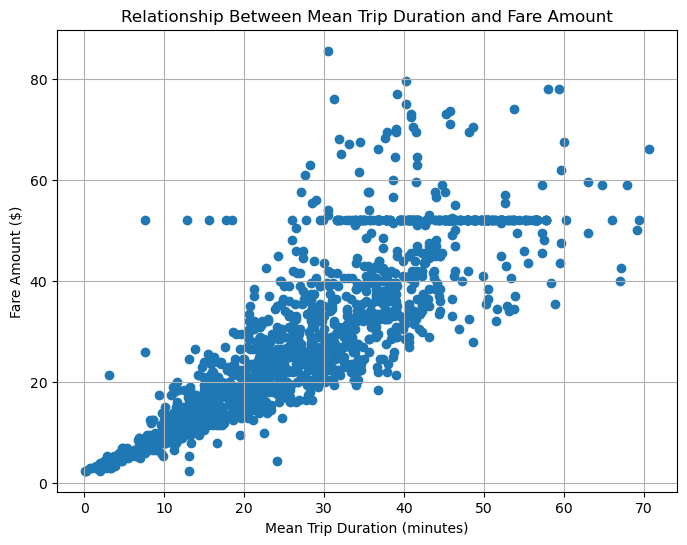

In [47]:
# Create a scatterplot to visualize the relationship between variables of interest



# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df0['mean_duration'], df0['fare_amount'])

# Add labels and title
plt.xlabel('Mean Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship Between Mean Trip Duration and Fare Amount')

# Show the plot
plt.grid(True)
plt.show()


In [48]:
# Check the values in the second horizontal line (around $62.50)
second_line_values = df0[(df0['fare_amount'] >= 50.0) & (df0['fare_amount'] <= 60.6)]

# Print the desired columns from the filtered DataFrame
print(second_line_values[['pickup_dropoff', 'fare_amount', 'duration', 'mean_duration', 'mean_distance']].head(30)) 


    pickup_dropoff  fare_amount   duration  mean_duration  mean_distance
11         236 132         52.0  36.800000      31.655556      19.303333
85         132 163         52.0  66.850000      52.326667      19.324000
115         138 88         51.5  53.650000      52.083333      15.540000
117        132 132         52.0   0.966667       7.583333       4.825000
163         138 87         53.0  59.033333      43.138095      14.608571
165         132 79         52.0  29.183333      37.850000      19.490000
210        132 145         51.5  40.766667      41.647222      15.876667
218        132 234         52.0  29.483333      47.922222      17.736667
222         132 48         52.0  39.833333      45.735417      19.131250
230         228 88         52.0  15.616667      15.616667       4.730000
250         132 48         52.0  45.450000      45.735417      19.131250
257        186 132         52.0  42.850000      44.408333      17.182500
274        132 148         52.0  71.583333      56.

Examine the first 30 of these trips.

### modeling variables



In [49]:

model_df = df0[['pickup_dropoff','fare_amount','mean_distance','mean_duration','VendorID','is_rush_hour']]
model_df.head()

,pickup_dropoff,fare_amount,mean_distance,mean_duration,VendorID,is_rush_hour
0,100 231,13.0,3.34,14.066667,2,0
1,186 43,16.0,1.80,26.500000,1,0
2,262 236,6.5,1.00,7.200000,1,1
3,188 97,20.5,3.70,30.250000,2,0
4,4 112,16.5,4.37,16.716667,2,0


/Users/mj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


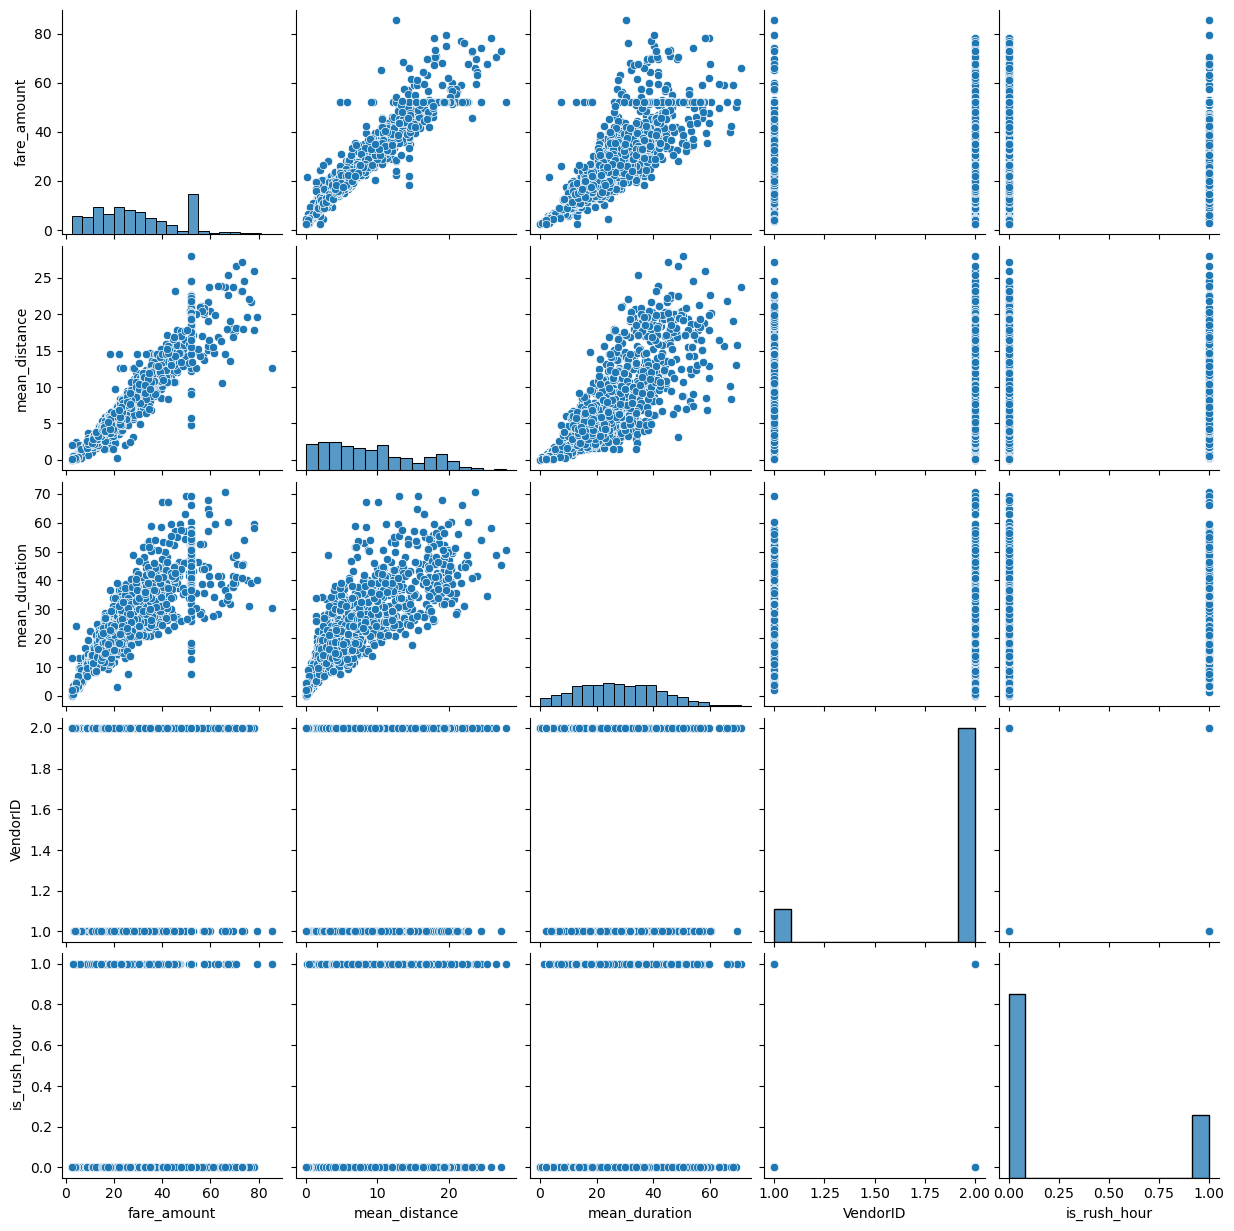

In [50]:
#a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.
# features to include in the pairplot
modeling_features = ['fare_amount', 'mean_distance', 'mean_duration','VendorID','is_rush_hour']

# Create the pair plot
sns.pairplot(model_df[modeling_features])

# Show the plot
plt.show()



In [51]:
# Correlation matrix to help determine most correlated variables

# Calculate the correlation matrix
correlation_matrix = df0[modeling_features].corr()

# Print the correlation matrix
print(correlation_matrix)


               fare_amount  mean_distance  mean_duration  VendorID  \
fare_amount       1.000000       0.949854       0.852058 -0.145388   
mean_distance     0.949854       1.000000       0.818454 -0.144983   
mean_duration     0.852058       0.818454       1.000000 -0.124002   
VendorID         -0.145388      -0.144983      -0.124002  1.000000   
is_rush_hour      0.023600       0.013790       0.055489 -0.000394   

               is_rush_hour  
fare_amount        0.023600  
mean_distance      0.013790  
mean_duration      0.055489  
VendorID          -0.000394  
is_rush_hour       1.000000  


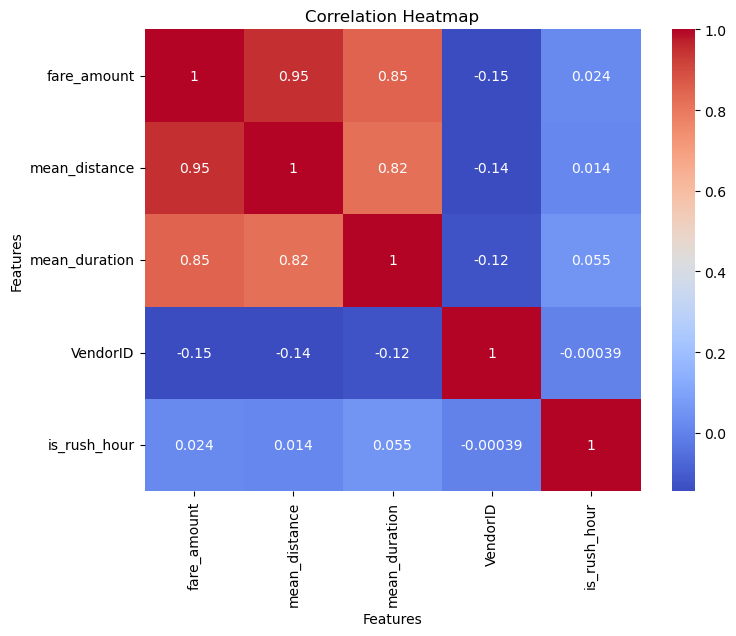

In [52]:
# Create correlation heatmap
### YOUR CODE HERE ###
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


### Split data into outcome variable and features

In [53]:


# Select features and outcome variable
X = model_df[['mean_distance', 'mean_duration', 'VendorID', 'is_rush_hour']]
Y = model_df['fare_amount']


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [54]:
# Remove the target column ('fare_amount') from the features
X = model_df.drop(columns='fare_amount')

# Set y variable
y = model_df['fare_amount']

# Display first few rows of X and y
print("X:")
print(X.head())

print("\ny:")
print(y.head())


X:
  pickup_dropoff  mean_distance  mean_duration  VendorID  is_rush_hour
0        100 231           3.34      14.066667         2             0
1         186 43           1.80      26.500000         1             0
2        262 236           1.00       7.200000         1             1
3         188 97           3.70      30.250000         2             0
4          4 112           4.37      16.716667         2             0

y:
0    13.0
1    16.0
2     6.5
3    20.5
4    16.5
Name: fare_amount, dtype: float64


###  Pre-process data


In [55]:
model_df.dtypes

pickup_dropoff     object
fare_amount       float64
mean_distance     float64
mean_duration     float64
VendorID            int64
is_rush_hour        int64
dtype: object

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate categorical and numeric features
categorical_features = ['pickup_dropoff']
numeric_features = ['mean_distance', 'mean_duration', 'VendorID', 'is_rush_hour']

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

### Split data into training and test sets

In [57]:
# Create training and testing sets

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create a preprocessor that applies different transformations to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Standardize the data & Fit



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate categorical and numeric features
categorical_features = ['pickup_dropoff'] 
numeric_features = ['mean_distance', 'mean_duration', 'VendorID', 'is_rush_hour']

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Set handle_unknown to ignore unknown categories

# Create a preprocessor that applies different transformations to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_df.drop(columns='fare_amount'), model_df['fare_amount'], test_size=0.2, random_state=42)

# Example model (replace with your actual model)
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)


### Evaluate model

### Train data

model performance by calculating the residual sum of squares and the explained variance score (R^2),the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [59]:
# Evaluate the model performance on the training data

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Calculate the residual sum of squares
rss = sum((train_predictions - y_train) ** 2)

# Calculate the explained variance score (R^2)
r2 = r2_score(y_train, train_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, train_predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, train_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_train, train_predictions, squared=False)

# Display the metrics
print(f"Residual Sum of Squares (RSS): {rss}")
print(f"Explained Variance Score (R^2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Residual Sum of Squares (RSS): 9164.27859069268
Explained Variance Score (R^2): 0.9722545777428853
Mean Absolute Error (MAE): 0.9642242613608354
Mean Squared Error (MSE): 7.720537987104203
Root Mean Squared Error (RMSE): 2.778585609101185


### Test data


In [60]:
# Evaluate the model performance on the testing data

# Encode the test data using the preprocessor from the pipeline
X_test_encoded = model.named_steps['preprocessor'].transform(X_test)

# Make predictions on the scaled test data
predictions_test = model.predict(X_test)

# Evaluate the model performance on the test data
rss_test = np.sum((y_test - predictions_test) ** 2)
r2_test = r2_score(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

print("Test Metrics:")
print(f"Residual Sum of Squares (RSS): {rss_test}")
print(f"Explained Variance Score (R^2): {r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")


Test Metrics:
Residual Sum of Squares (RSS): 7095.318808283868
Explained Variance Score (R^2): 0.9038004519271613
Mean Absolute Error (MAE): 2.684459320201871
Mean Squared Error (MSE): 23.8899623174541
Root Mean Squared Error (RMSE): 4.88773590913565


###  Results & Visualize results

 get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

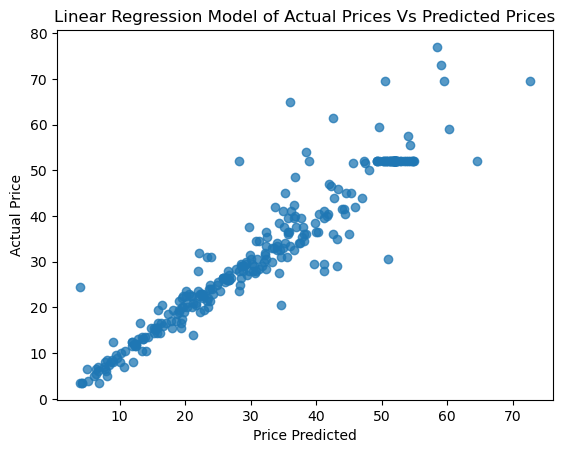

In [61]:
y_prediction = model.predict(X_test)
y_prediction
actual_values= y_test 
y_prediction_values = y_prediction 
plt.scatter(y_prediction, actual_values, alpha =.75) 
plt.xlabel('Price Predicted')
plt.ylabel('Actual Price') 
plt.title('Linear Regression Model of Actual Prices Vs Predicted Prices') 
plt.show()

In [62]:
# create our residuals
residuals = np.subtract(y_prediction, y_test)

# describe our residuals
residuals_df = pd.DataFrame(residuals)
residuals_description = residuals_df.describe()

# Display the description of residuals
print(residuals_description)

# Calculate and display the mean of residuals
residuals_mean = residuals.mean()
print(f"Mean of Residuals: {residuals_mean}")


       fare_amount
count   297.000000
mean     -0.249522
std       4.889601
min     -29.075951
25%      -0.790929
50%       0.156938
75%       1.604358
max      20.500009
Mean of Residuals: -0.2495221346301119


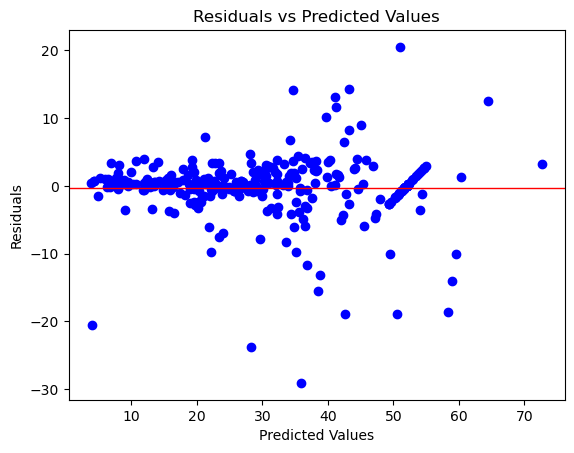

In [63]:
plt.scatter(y_prediction, residuals, color='blue') 
plt.axhline(y=residuals.mean(), color='red', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

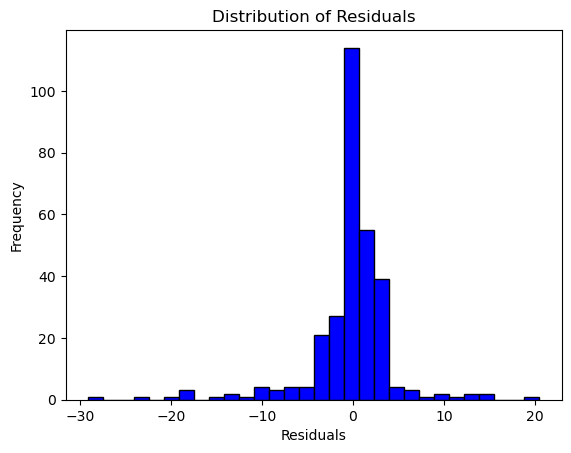

In [64]:

plt.hist(residuals, bins=30, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

### Coefficients
 Which feature had the greatest effect on trip fare?

In [65]:
# Get the feature names from the preprocessor
feature_names = (model.named_steps['preprocessor']
                           .named_transformers_['cat']
                           .get_feature_names_out(categorical_features)
                           .tolist() + numeric_features)

# Combine the feature names with the coefficients
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame to store the coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort the coefficients in descending order of magnitude
coefficients_df = coefficients_df.reindex(coefficients_df['coefficient'].abs().sort_values(ascending=False).index)

# Display the coefficients
print(coefficients_df)


                    feature  coefficient
514  pickup_dropoff_229 146    35.064540
698  pickup_dropoff_261 107    33.283459
879           mean_distance    24.446139
106  pickup_dropoff_132 140    23.754593
703  pickup_dropoff_261 226   -22.830177
..                      ...          ...
550  pickup_dropoff_231 231    -0.005613
642  pickup_dropoff_239 132    -0.004825
348  pickup_dropoff_158 163     0.002753
789   pickup_dropoff_68 168    -0.001794
588  pickup_dropoff_234 249    -0.000321

[883 rows x 2 columns]
